In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
consumerDiscrete = pd.read_excel('./data/U of M Student Data - Consumer Discretionary .xlsx',\
                                     'Screening', skiprows=7, na_values=['-', 'NM'] )
consumerStaples = pd.read_excel('./data/U of M Student Data - Consumer Staples.xlsx',\
                                     'Screening', skiprows=7, na_values=['-', 'NM'] )
industrials = pd.read_excel('./data/U of M Student Data - Industrials.xlsx',\
                                     'Screening', skiprows=7, na_values=['-', 'NM'] )

In [3]:
rename_col_dict = {'Industry Classifications':'industry', 'Geographic Locations':'loc',
    'Total Enterprise Value [My Setting] [12/31/2016] ($USDmm, Historical rate)':'t_ev',
    'Total Revenue [LTM] ($USDmm, Historical rate)':'t_rev',
    'EBITDA [LTM] ($USDmm, Historical rate)':'ebitda',
    'EBITDA Margin % [LTM]':'ebitda_margin',
    'TEV/LTM Total Revenues [My Setting] [LTM as of 12/31/2016] (x)':'t_ev/ltm',
    'TEV/LTM EBITDA [My Setting] [LTM as of 12/31/2016] (x)':'t_ev/ltm_ebitda',
    'Est. Annual Revenue Growth - 1 Yr % - Capital IQ [Latest] (%)':'est_ann_rev_gr_minus_1yr_minus_capiq',
    'Est. Annual EBITDA Growth - 1 Yr % - Capital IQ [Latest] (%)':'est_ann_ebitda_gr_minus_1yr_minus_capiq',
    'Total Revenues, 1 Yr Growth % [LTM] (%)':'t_rev_1yr_growth',
    'EBITDA, 1 Yr Growth % [LTM] (%)':'ebitda_1yr_gr',
    'Total Revenues, 3 Yr CAGR % [LTM] (%)':'t_rev_3_yr_cagr',
    'EBITDA, 3 Yr CAGR % [LTM] (%)':'ebitda_3yr_cagr',
    'Total Revenues, 5 Yr CAGR % [LTM] (%)':'t_rev_5yr_cagr',
    'EBITDA, 5 Yr CAGR % [LTM] (%)':'ebitda_5yr_cagr',
    'Return on Assets % [LTM]':'return_on_assets',
    'Return on Equity % [LTM]':'return_on_equity',
    'Capex as % of Revenues [Latest Annual] (%)':'capex/rev',
    'EBITDA / Interest Exp. [LTM]':'ebitda/interest_exp',
    'Total Debt/Capital % [Latest Annual]':'t_debt/cap',
    'Total Debt/Equity % [Latest Annual]':'t_debt/equity'}

In [4]:
consumerDiscrete.rename(columns=rename_col_dict, inplace=True)
consumerStaples.rename(columns=rename_col_dict, inplace=True)
industrials.rename(columns=rename_col_dict, inplace=True)

Let's look at `industrials`. First, I will do a basic overview of the data.

In [7]:
print 'industrials dataframe shape: ', industrials.shape
print 'columns name: ', industrials.columns.tolist()
print
print industrials.head(3)

industrials dataframe shape:  (473, 25)
columns name:  [u'Company Name', u'Exchange:Ticker', 'industry', u'Company Type', 'loc', 't_ev', 't_rev', 'ebitda', 'ebitda_margin', 't_ev/ltm', 't_ev/ltm_ebitda', 'est_ann_rev_gr_minus_1yr_minus_capiq', 'est_ann_ebitda_gr_minus_1yr_minus_capiq', 't_rev_1yr_growth', 'ebitda_1yr_gr', 't_rev_3_yr_cagr', 'ebitda_3yr_cagr', 't_rev_5yr_cagr', 'ebitda_5yr_cagr', 'return_on_assets', 'return_on_equity', 'capex/rev', 'ebitda/interest_exp', 't_debt/cap', 't_debt/equity']

                         Company Name Exchange:Ticker               industry  \
0               3M Company (NYSE:MMM)        NYSE:MMM  Industrials (Primary)   
1  A. O. Smith Corporation (NYSE:AOS)        NYSE:AOS  Industrials (Primary)   
2          AAON, Inc. (NasdaqGS:AAON)   NasdaqGS:AAON  Industrials (Primary)   

     Company Type                                 loc      t_ev    t_rev  \
0  Public Company  United States of America (Primary)  117144.9  30109.0   
1  Public Company  U

In [13]:
# let's take a look at numerical data
num_industrials = industrials.iloc[:, 5:]

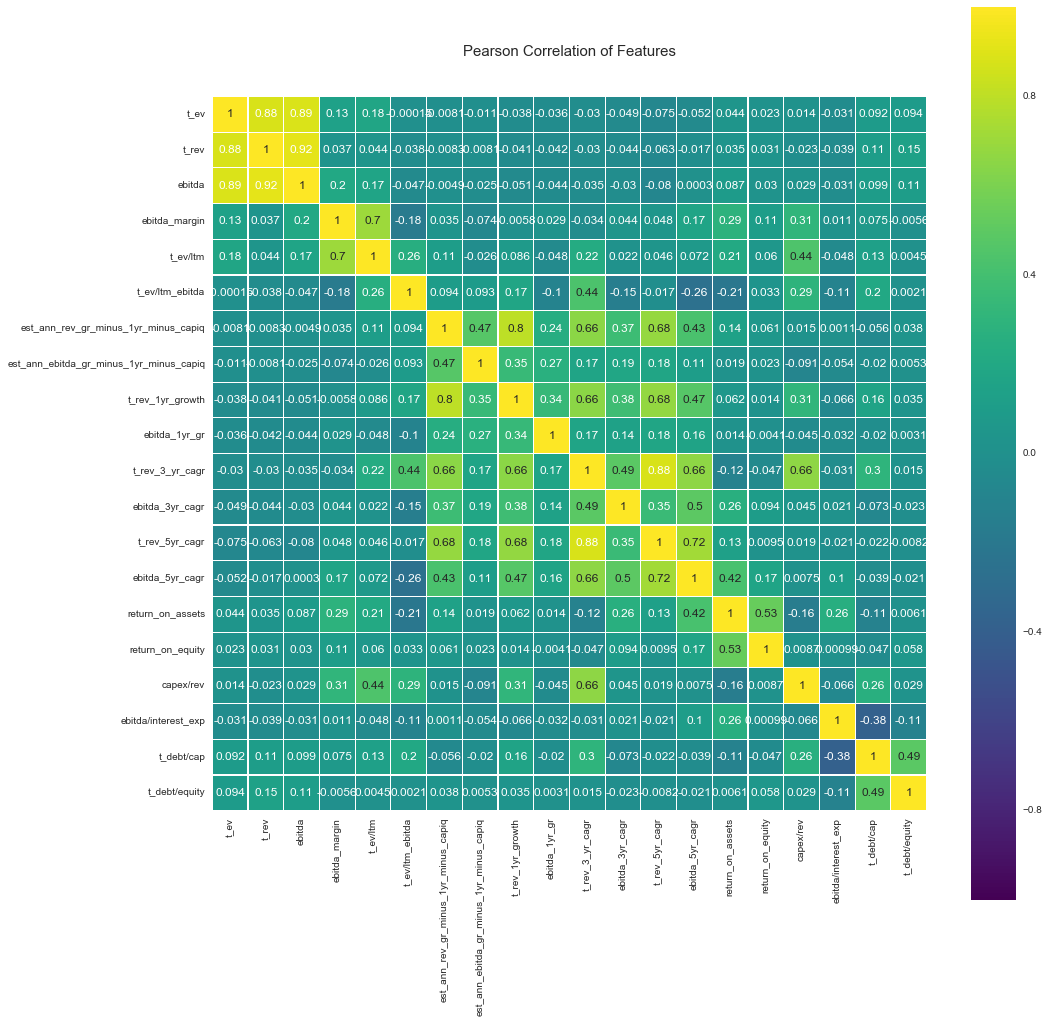

In [16]:
#num_industrials.corr(): Compute pairwise correlation of columns, excluding NA/null values
colormap = plt.cm.viridis
plt.figure(figsize=(16,16))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(num_industrials.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Takeaway from this plot is that TEV is strongly correlated with total revenue [LTM] and EBITDA 